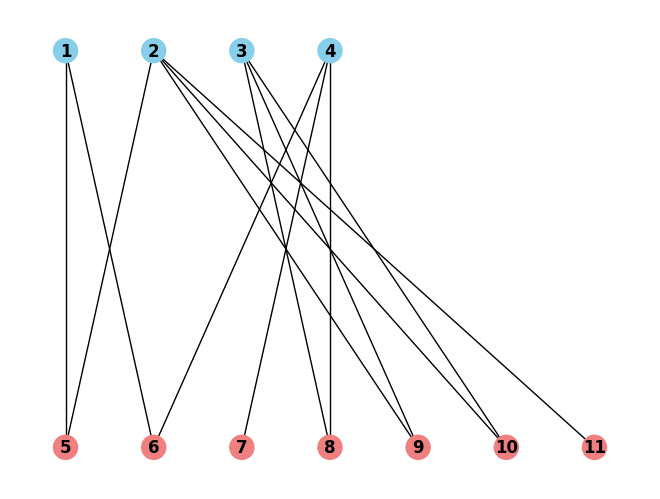

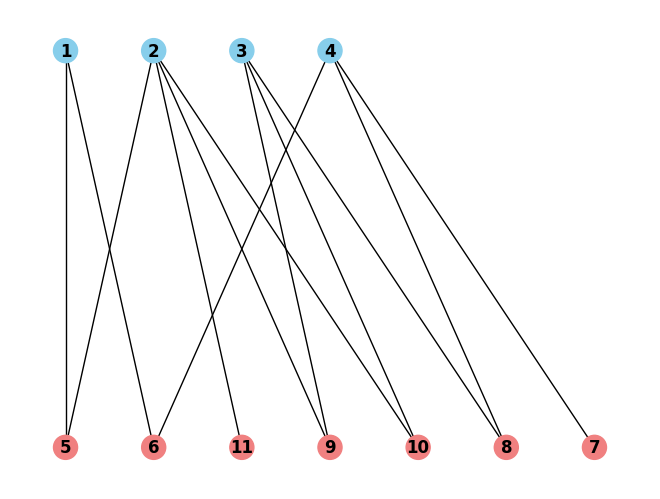

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_bipartite_graph(input_text, node_order=None):
    lines = input_text.strip().split('\n')

    # Filter out comments
    lines = [line for line in lines if not line.startswith('c')]

    # Find the p-line
    p_line = next(line for line in lines if line.startswith('p'))
    _, _, n0, n1, m = p_line.split()

    n0, n1, m = int(n0), int(n1), int(m)

    # Create a bipartite graph
    G = nx.Graph()

    # Add nodes from partition A
    G.add_nodes_from(range(1, n0+1), bipartite=0)

    # Add nodes from partition B
    G.add_nodes_from(range(n0 + 1, n0 + n1+1), bipartite=1)

    # Add edges
    for line in lines[1:]:
        x, y = map(int, line.split())
        G.add_edge(x, y)

    # Check if node_order is provided
    if node_order is not None:
        # Plot the graph with custom node positions
        pos = {node: (i, 1) if node <= n0 else (node_order.index(str(node)), 0) for i, node in enumerate(G.nodes)}
    else:
        # Plot the graph with default node positions
        pos = {node: (i, 1) if node <= n0 else (node - n0, 0) for i, node in enumerate(G.nodes, start=1)}

    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=['skyblue' if node <= n0 else 'lightcoral' for node in G.nodes])
    plt.show()

def read_input_file(file_path):
    with open(file_path, 'r') as file:
        input_text = file.read()
    return input_text

def read_order_file(file_path):
    with open(file_path, 'r') as file:
        order = [line.strip() for line in file]
    return order

# Usage
file_path = 'graph2.txt'
order_file = 'output.txt'
input_text = read_input_file(file_path)
node_order = read_order_file(order_file)
visualize_bipartite_graph(input_text)
visualize_bipartite_graph(input_text, node_order)
